In [1]:
import os, rasterio
import pandas as pd
import matplotlib as mat
import matplotlib.cm as cm
import numpy as np
from matplotlib import pyplot as plt
from math import pi
from windrose import WindroseAxes
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
from netCDF4 import Dataset
from datetime import datetime
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from docx import Document

C:\Users\phamq\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
os.makedirs("Result/Output", exist_ok=True)

In [2]:
stations = {
    "Oakridge_Willamett": (63, 30),
    "Hillsboro_Hare_Fie": (70, 30),
    "Hood_River_West_Side": (70, 34),
    "Silverton": (68, 30),
    "Portland_Spanger": (69, 31),
}
df = {}
month_number = "March"
UTC = -7

In [3]:
path = 'Result/Data/'; date_format = "%Y %m %d %H"
for (key, value) in stations.items():
    df[key] = pd.read_excel(path + f"Meteorological_Data_{value[0]}_{value[1]}.xlsx", header=0)
    x = pd.to_datetime(df[key][["Year", "Month", "Day", "Hour"]])
    df[key].rename(columns={"Year": "Year_Month_Day_Hour"}, inplace = True)
    df[key]["Year_Month_Day_Hour"] = x
    df[key].drop(['Month', 'Day', 'Hour'], axis = 1, inplace = True)

C:\Users\phamq\AppData\Local\Temp\ipykernel_13356\1937058550.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=45)


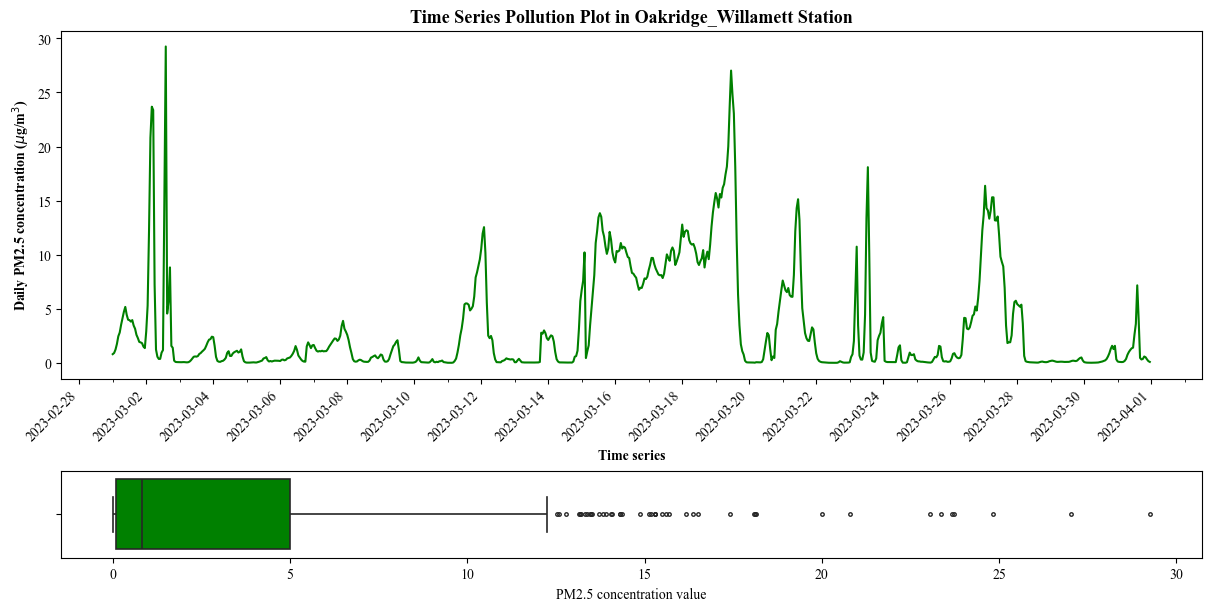

C:\Users\phamq\AppData\Local\Temp\ipykernel_13356\1937058550.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=45)


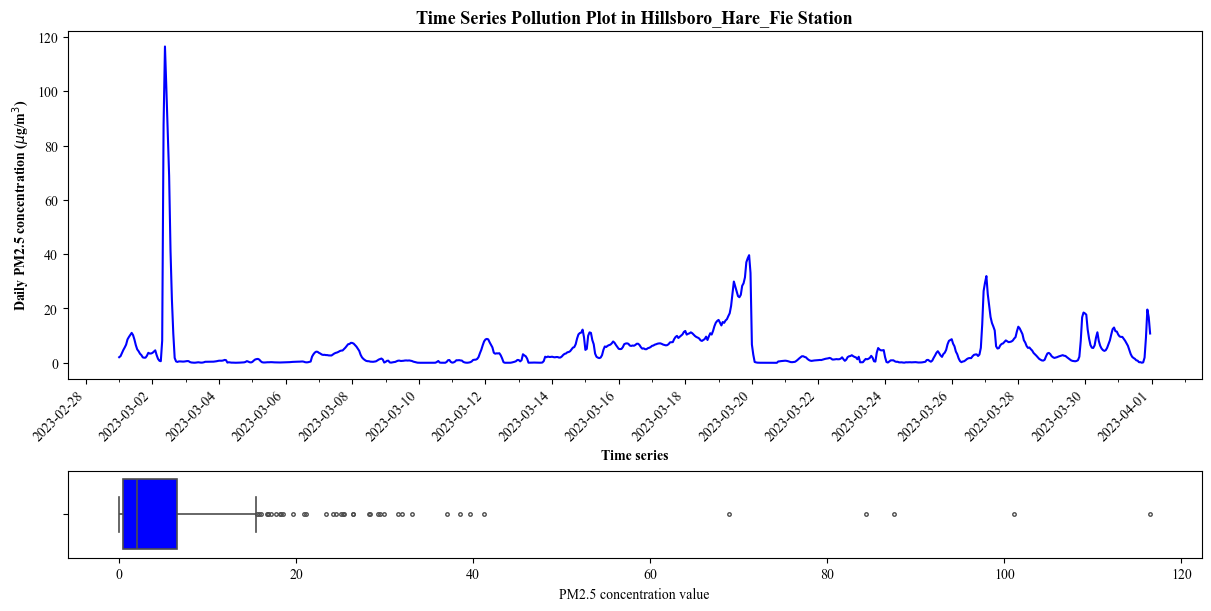

C:\Users\phamq\AppData\Local\Temp\ipykernel_13356\1937058550.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=45)


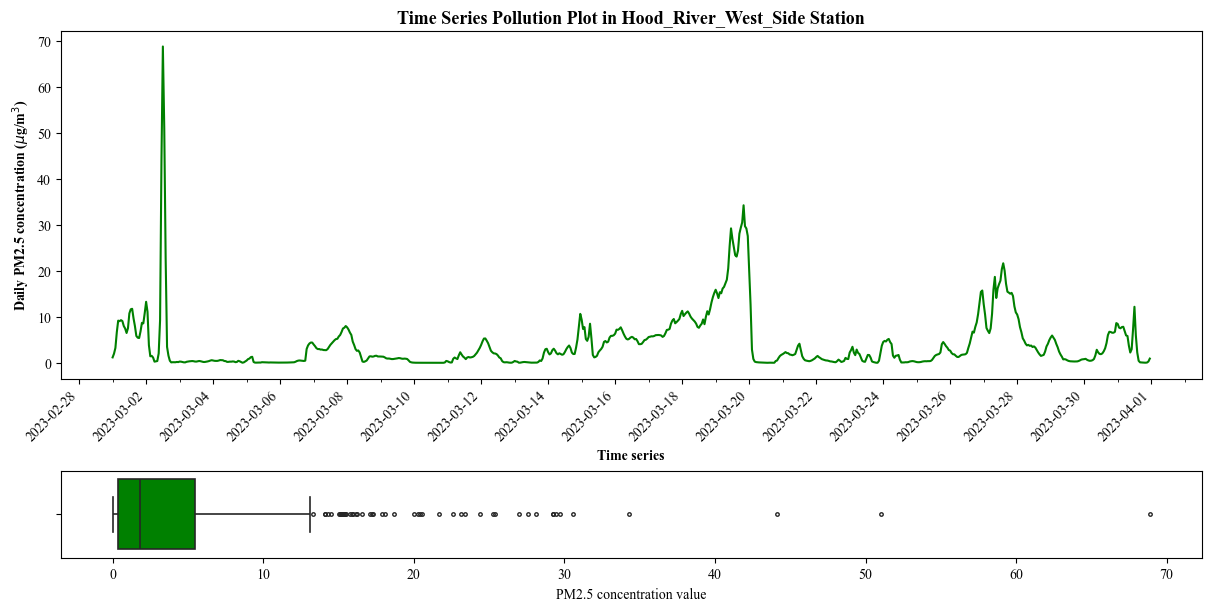

C:\Users\phamq\AppData\Local\Temp\ipykernel_13356\1937058550.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=45)


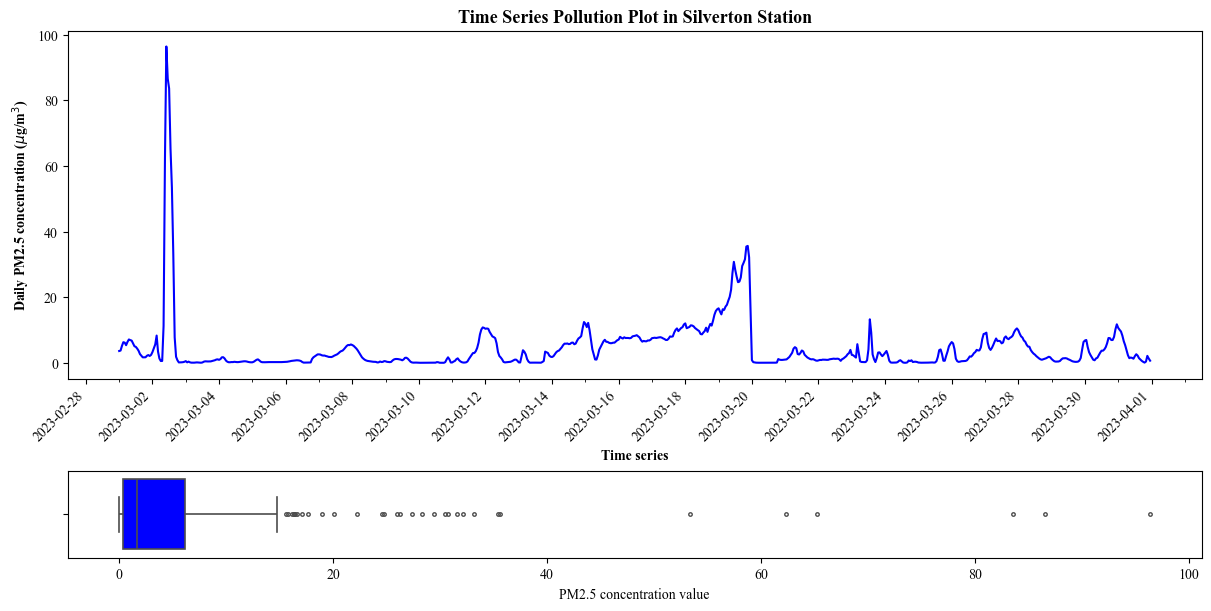

C:\Users\phamq\AppData\Local\Temp\ipykernel_13356\1937058550.py:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate(rotation=45)


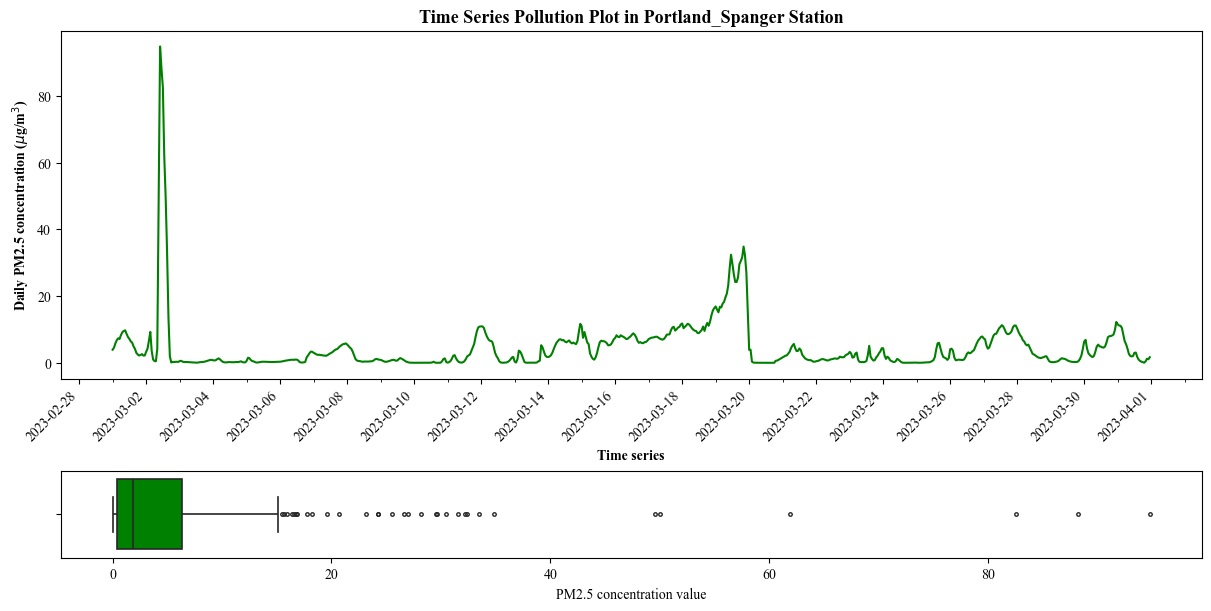

In [4]:
for i, station in enumerate(stations.keys()):
    times_new_roman_path = 'F:/Fonts/times.ttf'
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['figure.figsize'] = (12, 6)
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], figure=fig)
    ax1 = fig.add_subplot(gs[0])
    if (i % 2 == 0):
        ax1.plot(df[station]['Year_Month_Day_Hour'].values, df[station]['PM2.5'].values, color='green')
    else:
        ax1.plot(df[station]['Year_Month_Day_Hour'].values, df[station]['PM2.5'].values, color='blue')
    ax1.set_title(f'Time Series Pollution Plot in {station} Station', fontsize=13, weight="bold")
    ax1.set_xlabel('Time series', fontsize=10, weight="bold")
    ax1.set_ylabel(r'Daily PM2.5 concentration ($\mu$g/m$^3$)', fontsize=10, weight="bold")
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate(rotation=45)
    ax2 = fig.add_subplot(gs[1])
    if (i % 2 == 0):
        sns.boxplot(x="PM2.5", data=df[station], color='green', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
    else:
        sns.boxplot(x="PM2.5", data=df[station], color='blue', fliersize=2.5, linewidth=1.2, saturation=1.5, ax=ax2)
    ax2.set_xlabel('PM2.5 concentration value')
    ax2.set_ylabel(' ')
    fig.savefig(f'Result/Output/PM2.5_{station}.jpg', format='jpg', dpi=1000)
    plt.show()

In [5]:
list_columns = ['PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN']
mean_station = {}; path = 'Result/Data/'; date_format = "%Y %m %d %H"
for (key, value) in stations.items():
    df[key] = pd.read_excel(path + f"Meteorological_Data_{value[0]}_{value[1]}.xlsx", header=0)
    mean_station[key] = pd.DataFrame(df[key].groupby('Hour')[list_columns].mean().reset_index(), columns=['Hour', 'PBL','TEMP','PRES','WSPEED','WDIR','RH', 'RAIN'])

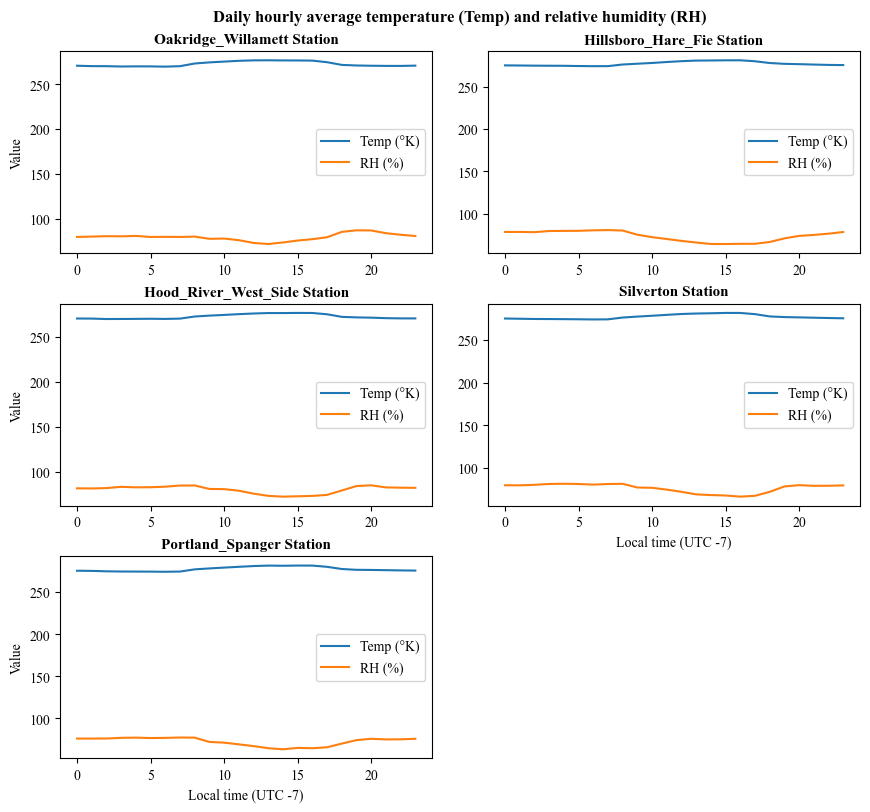

In [6]:
plt.rcParams['figure.figsize'] = (10, 12)
fig = plt.figure(); axes = {}
for i, station in enumerate(stations.keys()):
    numrows = 4; numcols = 2
    axes[i] = fig.add_subplot(numrows, numcols, i+1)
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["TEMP"].values)
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["RH"].values)
    axes[i].set_title(f"{station} Station", fontsize = 11, weight = "bold")
    if i % numcols == 0:
        axes[i].set_ylabel('Value', fontsize=10)
    else: axes[i].set_ylabel(' ')
    if i >= len(stations.keys())-numcols:
        axes[i].set_xlabel(f'Local time (UTC {UTC})')
    else: axes[i].set_xlabel(' ')
    axes[i].legend(['Temp (\u00B0K)', 'RH (%)'], loc='center right')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.25)
plt.suptitle("Daily hourly average temperature (Temp) and relative humidity (RH)", weight="bold", fontsize=12, y=0.935)
plt.show()
fig.savefig('Result/Output/Daily hourly average Temp & RH_large.jpg', format='jpg', dpi=1000)

In [7]:
doc = Document()

for station in stations.keys():
    min_value, max_value = mean_station[station]['TEMP'].min(), mean_station[station]['TEMP'].max()
    print(f"Minimum value of Temperature of {station}: {min_value}")
    doc.add_paragraph(f"Minimum value of Temperature of {station}: {min_value}")
    print(f"Maximum value of Temperature of {station}: {max_value}")
    doc.add_paragraph(f"Maximum value of Temperature of {station}: {max_value}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

print("-" * 100)
doc.add_paragraph("-" * 100)

for station in stations.keys():
    min_value, max_value = mean_station[station]['RH'].min(), mean_station[station]['RH'].max()
    print(f"Minimum value of RH of {station}: {min_value}")
    doc.add_paragraph(f"Minimum value of RH of {station}: {min_value}")
    print(f"Maximum value of RH of {station}: {max_value}")
    doc.add_paragraph(f"Maximum value of RH of {station}: {max_value}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

Minimum value of Temperature of Oakridge_Willamett: 269.53846199281753
Maximum value of Temperature of Oakridge_Willamett: 276.6155730216734
------------------------------
Minimum value of Temperature of Hillsboro_Hare_Fie: 274.00858528383316
Maximum value of Temperature of Hillsboro_Hare_Fie: 280.9591546827747
------------------------------
Minimum value of Temperature of Hood_River_West_Side: 270.00572647586944
Maximum value of Temperature of Hood_River_West_Side: 276.804441390499
------------------------------
Minimum value of Temperature of Silverton: 273.85782844789566
Maximum value of Temperature of Silverton: 281.49773776146674
------------------------------
Minimum value of Temperature of Portland_Spanger: 273.94213571856096
Maximum value of Temperature of Portland_Spanger: 281.3091115643901
------------------------------
----------------------------------------------------------------------------------------------------
Minimum value of RH of Oakridge_Willamett: 71.83649383052

In [8]:
df_filter = {}; mean_filter_RH = {}; mean_filter_TEMP = {}
for station in stations.keys():
    df_filter[station] = df[station][(df[station]['Hour'] >= 10) & (df[station]['Hour'] <= 15)]
    mean_filter_RH[station] = pd.DataFrame(df_filter[station].groupby('Hour')['RH'].mean().reset_index(), columns=['RH'])
    mean_filter_TEMP[station] = pd.DataFrame(df_filter[station].groupby('Hour')['TEMP'].mean().reset_index(), columns=['TEMP'])
minval = min(mean_filter_RH[station]['RH'].min() for station in stations.keys())
maxval = max(mean_filter_RH[station]['RH'].max() for station in stations.keys())
print('giá trị thấp nhất của RH từ 10 -> 15 giờ: ', minval)
doc.add_paragraph(f'giá trị thấp nhất của RH từ 10 -> 15 giờ: {minval}')
print('giá trị cao nhất của RH từ 10 -> 15 giờ: ', maxval)
doc.add_paragraph(f'giá trị cao nhất của RH từ 10 -> 15 giờ: {maxval}')

minval = min(mean_filter_TEMP[station]['TEMP'].min() for station in stations.keys())
maxval = max(mean_filter_TEMP[station]['TEMP'].max() for station in stations.keys())
print('giá trị thấp nhất của TEMP từ 10 -> 15 giờ: ', minval)
doc.add_paragraph(f'giá trị thấp nhất của TEMP từ 10 -> 15 giờ: {minval}')
print('giá trị cao nhất của TEMP từ 10 -> 15 giờ: ', maxval)
doc.add_paragraph(f'giá trị cao nhất của TEMP từ 10 -> 15 giờ: {maxval}')

giá trị thấp nhất của RH từ 10 -> 15 giờ:  63.49138296804121
giá trị cao nhất của RH từ 10 -> 15 giờ:  80.6601913206039
giá trị thấp nhất của TEMP từ 10 -> 15 giờ:  274.59730185231854
giá trị cao nhất của TEMP từ 10 -> 15 giờ:  281.49773776146674


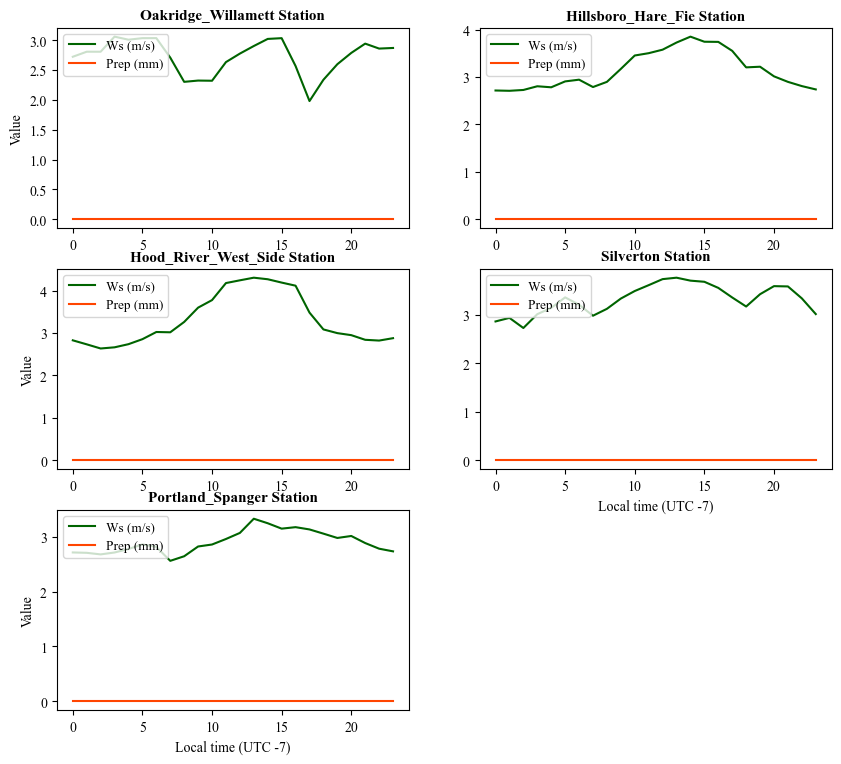

In [9]:
plt.rcParams['figure.figsize'] = (10, 12)
fig = plt.figure(); axes = {}

for i, station in enumerate(stations.keys()):
    numrows = 4; numcols = 2
    axes[i] = fig.add_subplot(numrows, numcols, i+1)
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["WSPEED"].values, color="darkgreen")
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["RAIN"].values, color="orangered")
    axes[i].set_title(f"{station} Station", fontsize=11, weight="bold")
    axes[i].set_xlabel(' ')
    if (i % numcols == 0):
        axes[i].set_ylabel('Value', fontsize=10)
    else: axes[i].set_ylabel(' ')
    if (i >= len(stations.keys()) - numcols):
        axes[i].set_xlabel(f'Local time (UTC {UTC})')
    else: axes[i].set_xlabel(' ')
    axes[i].legend(['Ws (m/s)', 'Prep (mm)'], fontsize=9.5, loc='upper left')

fig.savefig('Result/Output/Daily hourly average Ws & Prep_large.jpg', format='jpg', dpi=1000)

In [10]:
for station in stations.keys():
    print(f"Hour of {station} maximum Wind Speed: {mean_station[station]['WSPEED'].idxmax()}")
    doc.add_paragraph(f"Hour of {station} maximum Wind Speed: {mean_station[station]['WSPEED'].idxmax()}")
    min_val, max_val = mean_station[station]['WSPEED'].min(), mean_station[station]['WSPEED'].max()
    print(f"Minimum value of Wind Speed of {station}: {min_val}")
    doc.add_paragraph(f"Minimum value of Wind Speed of {station}: {min_val}")
    print(f"Maximum value of Wind Speed of {station}: {max_val}")
    doc.add_paragraph(f"Maximum value of Wind Speed of {station}: {max_val}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

for station in stations.keys():
    min_val, max_val = mean_station[station]['RAIN'].min(), mean_station[station]['RAIN'].max()
    print(f"Minimum value of Rain of {station}: {min_val}")
    doc.add_paragraph(f"Minimum value of Rain of {station}: {min_val}")
    print(f"Maximum value of Rain of {station}: {max_val}")
    doc.add_paragraph(f"Maximum value of Rain of {station}: {max_val}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

Hour of Oakridge_Willamett maximum Wind Speed: 3
Minimum value of Wind Speed of Oakridge_Willamett: 1.9812017857067046
Maximum value of Wind Speed of Oakridge_Willamett: 3.0608761118304346
------------------------------
Hour of Hillsboro_Hare_Fie maximum Wind Speed: 14
Minimum value of Wind Speed of Hillsboro_Hare_Fie: 2.708213360078873
Maximum value of Wind Speed of Hillsboro_Hare_Fie: 3.849894544289958
------------------------------
Hour of Hood_River_West_Side maximum Wind Speed: 13
Minimum value of Wind Speed of Hood_River_West_Side: 2.6357669330412343
Maximum value of Wind Speed of Hood_River_West_Side: 4.304664825239489
------------------------------
Hour of Silverton maximum Wind Speed: 13
Minimum value of Wind Speed of Silverton: 2.727527549189906
Maximum value of Wind Speed of Silverton: 3.764765137626279
------------------------------
Hour of Portland_Spanger maximum Wind Speed: 13
Minimum value of Wind Speed of Portland_Spanger: 2.5586538478251426
Maximum value of Wind Speed

In [11]:
mean_filter = {}
for station in stations.keys():
    df_filter[station] = df[station][(df[station] >= 10) & (df[station] <= 17)]
    mean_filter[station] = pd.DataFrame(df_filter[station].groupby('Hour')['RAIN'].mean().reset_index(), columns=['RAIN'])
minval = min(mean_filter[station]['RAIN'].min() for station in stations.keys())
maxval = max(mean_filter[station]['RAIN'].max() for station in stations.keys())
print('Giá trị thấp nhất của tỉ lệ mưa từ 10 -> 17 giờ: ', minval)
doc.add_paragraph(f'Giá trị thấp nhất của tỉ lệ mưa từ 10 -> 17 giờ: {minval}')
print('Giá trị lớn nhất của tỉ lệ mưa từ 10 -> 17 giờ: ', maxval)
doc.add_paragraph(f'Giá trị lớn nhất của tỉ lệ mưa từ 10 -> 17 giờ: {maxval}')

Giá trị thấp nhất của tỉ lệ mưa từ 10 -> 17 giờ:  nan
Giá trị lớn nhất của tỉ lệ mưa từ 10 -> 17 giờ:  nan


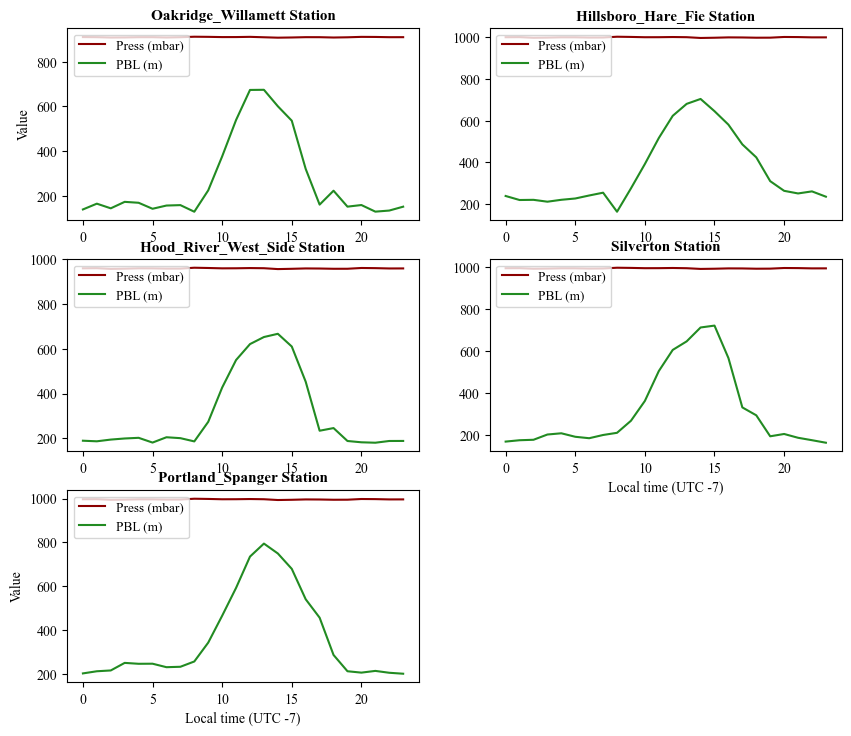

In [12]:
plt.rcParams['figure.figsize'] = (10, 11.5)
fig = plt.figure(); axes = {}

for i, station in enumerate(stations.keys()):
    num_rows = 4; num_cols = 2
    axes[i] = fig.add_subplot(num_rows, num_cols, i+1)
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["PRES"].values, color="darkred")
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["PBL"].values, color="forestgreen")
    axes[i].set_title(f'{station} Station', fontsize=11, weight="bold")
    if (i % num_rows == 0): axes[i].set_ylabel('Value', fontsize=10)
    else: axes[i].set_xlabel(' ')
    if (i >= len(stations.keys())-num_cols):
        axes[i].set_xlabel(f'Local time (UTC {UTC})', fontsize=10)
    else: axes[i].set_xlabel(' ')
    axes[i].legend(['Press (mbar)', 'PBL (m)'], fontsize=9.5, loc='upper left')

fig.savefig('Result/Output/Daily hourly average Press & PBL_large.jpg', format='jpg', dpi=1000)

In [13]:
for station in stations.keys():
    min_val, max_val = mean_station[station]['PRES'].min(), mean_station[station]['PRES'].max()
    print(f"Minimum value of Pressure of {station}: {min_val}")
    doc.add_paragraph(f"Minimum value of Pressure of {station}: {min_val}")
    print(f"Maximum value of Pressure of {station}: {max_val}")
    doc.add_paragraph(f"Maximum value of Pressure of {station}: {max_val}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

for station in stations.keys():
    min_val, max_val = mean_station[station]['RH'].min(), mean_station[station]['RH'].max()
    print(f"Minimum value of Relative Humidity of {station}: {min_val}")
    doc.add_paragraph(f"Minimum value of Relative Humidity of {station}: {min_val}")
    print(f"Maximum value of Relative Humidity of {station}: {max_val}")
    doc.add_paragraph(f"Maximum value of Relative Humidity of {station}: {max_val}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

Minimum value of Pressure of Oakridge_Willamett: 906.9392893145161
Maximum value of Pressure of Oakridge_Willamett: 911.196736391129
------------------------------
Minimum value of Pressure of Hillsboro_Hare_Fie: 997.4534400201613
Maximum value of Pressure of Hillsboro_Hare_Fie: 1003.4286063508065
------------------------------
Minimum value of Pressure of Hood_River_West_Side: 956.4685962701614
Maximum value of Pressure of Hood_River_West_Side: 962.5593649193548
------------------------------
Minimum value of Pressure of Silverton: 992.5384576612903
Maximum value of Pressure of Silverton: 998.2481199596774
------------------------------
Minimum value of Pressure of Portland_Spanger: 993.0856829637097
Maximum value of Pressure of Portland_Spanger: 998.9948664314516
------------------------------
Minimum value of Relative Humidity of Oakridge_Willamett: 71.83649383052703
Maximum value of Relative Humidity of Oakridge_Willamett: 87.10110621298513
------------------------------
Minimum va

In [14]:
for station in stations.keys():
    df_filter[station] = df[station][(df[station]['Hour'] >= 0) & (df[station]['Hour'] <= 6) | (df[station]['Hour'] >= 17) & (df[station]['Hour'] <= 23)]
    mean_filter[station] = pd.DataFrame(df_filter[station].groupby('Hour')['PRES'].mean().reset_index(), columns=['PRES'])
minval = min(mean_filter[station]["PRES"].min() for station in stations.keys())
maxval = max(mean_filter[station]["PRES"].max() for station in stations.keys())
print('giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', minval)
doc.add_paragraph(f'giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: {minval}')
print('giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', maxval)
doc.add_paragraph(f'giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: {maxval}')

print("-" * 100)
doc.add_paragraph("-"*100)


for station in stations.keys():
    df_filter[station] = df[station][(df[station]['Hour'] >= 10) & (df[station]['Hour'] <= 15)]
    mean_filter[station] = pd.DataFrame(df_filter[station].groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
minval = min(mean_filter[station]['PBL'].min() for station in stations.keys())
maxval = max(mean_filter[station]['PBL'].max() for station in stations.keys())
print('giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', minval)
doc.add_paragraph(f'giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: {minval}')
print('giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: ', maxval)
doc.add_paragraph(f'giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ: {maxval}')
print("-" * 100)
doc.add_paragraph("-" * 100)

for station in stations.keys():
    df_filter[station] = df[station][(df[station]['Hour'] >= 7) & (df[station]['Hour'] <= 16)]
    mean_filter[station] = pd.DataFrame(df_filter[station].groupby('Hour')['PBL'].mean().reset_index(), columns=['PBL'])
minval = min(mean_filter[station]['PBL'].min() for station in stations.keys())
maxval = max(mean_filter[station]['PBL'].max() for station in stations.keys())
print('giá trị thấp nhất của PBL từ 7 đến 16 giờ: ', minval)
doc.add_paragraph(f'giá trị thấp nhất của PBL từ 7 đến 16 giờ: {minval}')
print('giá trị lớn nhất của PBL từ 7 đến 16 giờ: ', maxval)
doc.add_paragraph(f'giá trị lớn nhất của PBL từ 7 đến 16 giờ: {maxval}')
print("-" * 100)
doc.add_paragraph("-" * 100)

giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  907.5822731854838
giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  1002.2212777217742
----------------------------------------------------------------------------------------------------
giá trị thấp nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  363.3534230878276
giá trị lớn nhất của PBL từ 0 đến 6 giờ và từ 17 đến 23 giờ:  794.3683358469317
----------------------------------------------------------------------------------------------------
giá trị thấp nhất của PBL từ 7 đến 16 giờ:  130.62847875779676
giá trị lớn nhất của PBL từ 7 đến 16 giờ:  794.3683358469317
----------------------------------------------------------------------------------------------------


In [15]:
path = 'Result/Data/'; date_format = "%Y %m %d %H"
for (key, value) in stations.items():
    df[key] = pd.read_excel(path + f"Meteorological_Data_{value[0]}_{value[1]}.xlsx", header=0)
    mean_station[key] = pd.DataFrame(df[key].groupby('Hour')['PM2.5'].mean().reset_index(), columns=['Hour', 'PM2.5'])

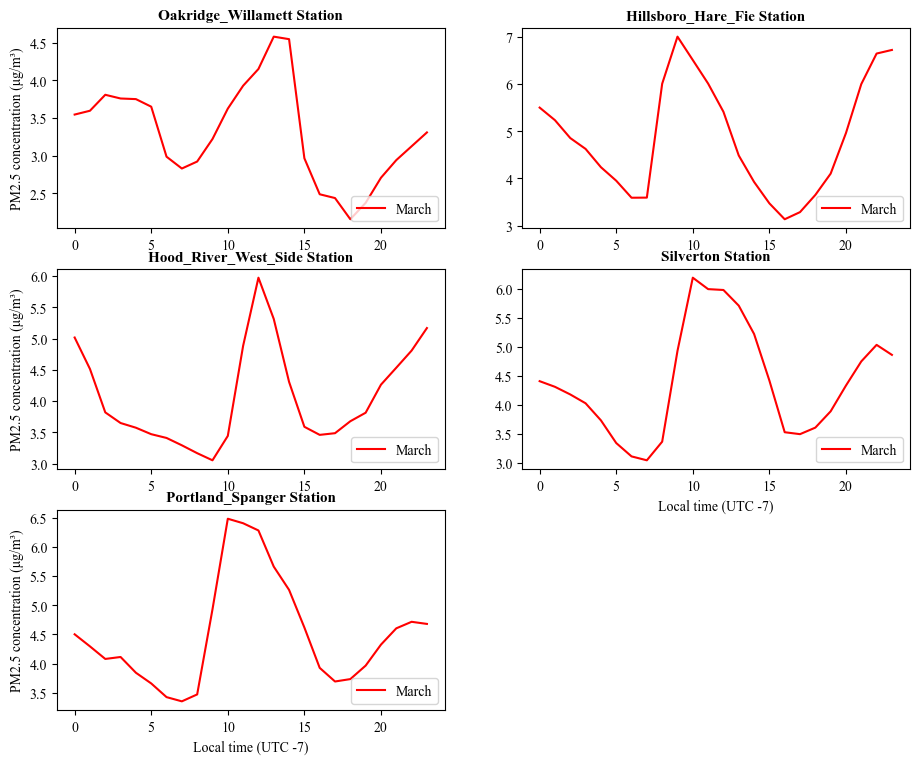

In [16]:
plt.rcParams['figure.figsize'] = (11, 12)
fig = plt.figure()

for i, station in enumerate(stations.keys()):
    num_rows = 4; num_cols = 2
    axes[i] = fig.add_subplot(num_rows, num_cols, i+1)
    axes[i].plot(mean_station[station]["Hour"].values, mean_station[station]["PM2.5"].values, color="red")
    axes[i].set_title(f'{station} Station', fontsize=11, weight="bold")
    if i % num_cols == 0:
        axes[i].set_ylabel('PM2.5 concentration (\u03BCg/m\u00b3)', fontsize=10)
    else:
        axes[i].set_ylabel(' ', fontsize=10)
    if i >= len(stations.keys()) - num_cols:
        axes[i].set_xlabel(f'Local time (UTC {UTC})', fontsize=10)
    else:
        axes[i].set_xlabel(' ', fontsize=10)
    axes[i].legend([month_number], loc='lower right')
# Save time series plot
fig.savefig('Result/Output/PM2.5_Average_Stations.jpg', format='jpg', dpi=1000)

In [17]:
for station in stations.keys():
    min_value, max_value = mean_station[station]["PM2.5"].min(), mean_station[station]["PM2.5"].max()
    print(f"Minimum value of PM2.5 of {station}: {min_value}")
    doc.add_paragraph(f"Minimum value of PM2.5 of {station}: {min_value}")
    print(f"Maximum value of PM2.5 of {station}: {max_value}")
    doc.add_paragraph(f"Maximum value of PM2.5 of {station}: {max_value}")
    print("-" * 30)
    doc.add_paragraph("-" * 30)

Minimum value of PM2.5 of Oakridge_Willamett: 2.154494718077683
Maximum value of PM2.5 of Oakridge_Willamett: 4.577956549132303
------------------------------
Minimum value of PM2.5 of Hillsboro_Hare_Fie: 3.1370118621346212
Maximum value of PM2.5 of Hillsboro_Hare_Fie: 7.001069440776783
------------------------------
Minimum value of PM2.5 of Hood_River_West_Side: 3.052255829525811
Maximum value of PM2.5 of Hood_River_West_Side: 5.974357297028145
------------------------------
Minimum value of PM2.5 of Silverton: 3.042037256722969
Maximum value of PM2.5 of Silverton: 6.188388382595393
------------------------------
Minimum value of PM2.5 of Portland_Spanger: 3.352974218526674
Maximum value of PM2.5 of Portland_Spanger: 6.484333682324617
------------------------------


In [18]:
list_variable = ["PM2.5", "PBL", "TEMP", "PRES", "WSPEED", "WDIR", "RH", "RAIN"]
for station in stations.keys():
    print(f"Meteorology Information {station} Station:")
    doc.add_paragraph(f"Meteorology Information {station} Station:")
    df_x = df[station][list_variable].describe()
    t = doc.add_table(df_x.shape[0]+1, df_x.shape[1]+1); t.style = 'Table Grid'
    for j in range(df_x.shape[-1]):
        t.cell(0,j+1).text = df_x.columns[j]
    for j in range(df_x.shape[0]):
        t.cell(j+1, 0).text = df_x.index[j]
    for i in range(df_x.shape[0]):
        for j in range(df_x.shape[-1]):
            t.cell(i+1,j+1).text = str(df_x.values[i,j])

Meteorology Information Oakridge_Willamett Station:
Meteorology Information Hillsboro_Hare_Fie Station:
Meteorology Information Hood_River_West_Side Station:
Meteorology Information Silverton Station:
Meteorology Information Portland_Spanger Station:


In [19]:
df_table = pd.DataFrame(columns = ["Oakridge_Willamett", "Hillsboro_Hare_Fie", "Hood_River_West_Side", "Silverton", "Portland_Spanger"])
for station in stations.keys():
    df_table[station] = df[station]["PM2.5"]
print("PM2.5 Concentration in each station")
doc.add_paragraph("PM2.5 Concentration in each station")
df_table = df_table.describe()
t = doc.add_table(df_table.shape[0]+1, df_table.shape[1]+1); t.style = 'Table Grid'
for j in range(df_table.shape[-1]):
    t.cell(0,j+1).text = df_table.columns[j]
for j in range(df_table.shape[0]):
    t.cell(j+1, 0).text = df_table.index[j]
for i in range(df_table.shape[0]):
    for j in range(df_table.shape[-1]):
        t.cell(i+1,j+1).text = str(df_table.values[i,j])

PM2.5 Concentration in each station


In [20]:
doc.save('Result/Output/EMC_METEOROLOGY_REPORT.docx')

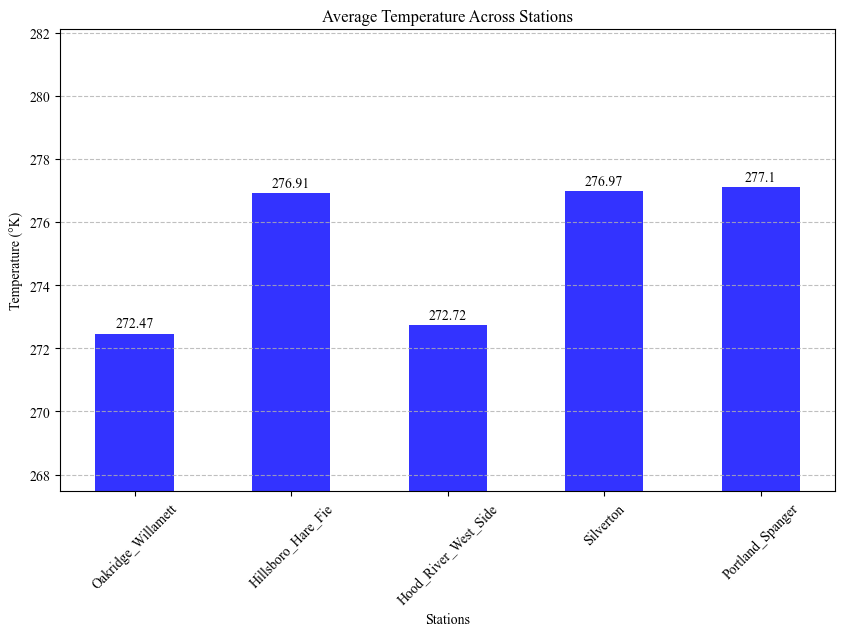

In [21]:
# Data for temperature from each station
station_temps = [
    df[station]["TEMP"].mean() for station in stations.keys()
]

# Plotting the bar chart with narrower width
fig = plt.figure(figsize=(10, 6))
bars = plt.bar(stations.keys(), station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Temperature (°K)')
plt.title('Average Temperature Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

minval = min(station_temps)
maxval = max(station_temps)

# Set y-axis limits starting from 280 and incrementing by 0.2
plt.ylim(minval-5, maxval+5)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()

fig.savefig('Result/Output/Temperature.jpg', format = 'jpg', dpi = 1000)

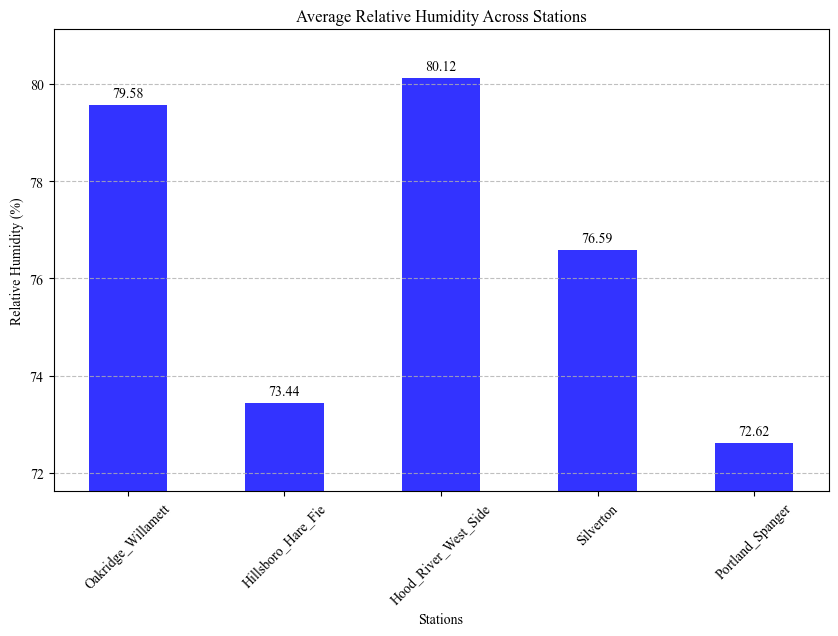

In [22]:
import matplotlib.pyplot as plt

# Data for temperature from each station
station_temps = [
    df[station]["RH"].mean() for station in stations.keys()
]

# Plotting the bar chart with narrower width
fig = plt.figure(figsize=(10, 6))
bars = plt.bar(stations.keys(), station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Relative Humidity (%)')
plt.title('Average Relative Humidity Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

minval = min(station_temps)
maxval = max(station_temps)

# Set y-axis limits starting from 280 and incrementing by 0.2
plt.ylim(minval-1, maxval+1)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()
fig.savefig('Result/Output/RH.jpg', format = 'jpg', dpi = 1000)

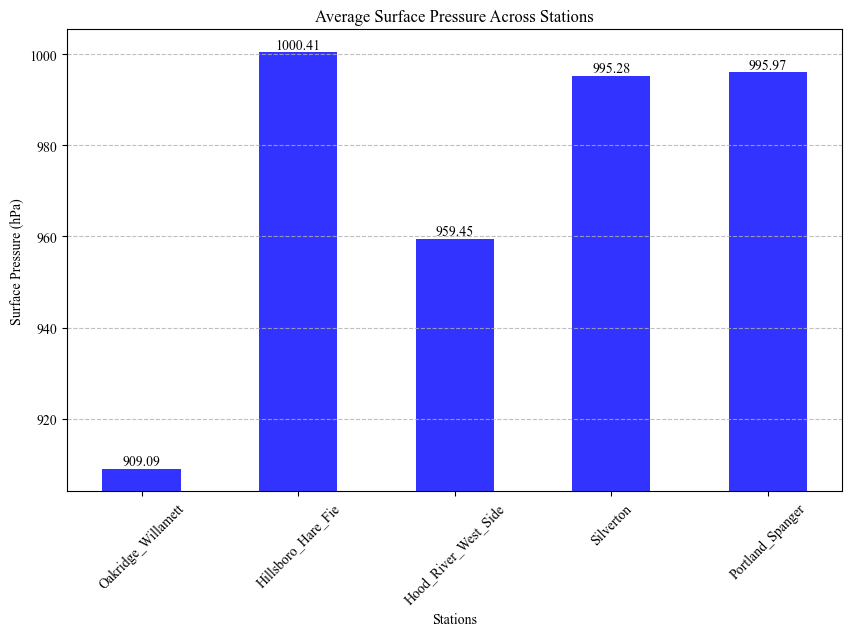

In [23]:
import matplotlib.pyplot as plt

# Data for temperature from each station
station_temps = [
    df[station]["PRES"].mean() for station in stations.keys()
]

# Plotting the bar chart with narrower width
fig = plt.figure(figsize=(10, 6))
bars = plt.bar(stations.keys(), station_temps, color='blue', width=0.5, alpha=0.8)  # Adjust the width here
plt.xlabel('Stations')
plt.ylabel('Surface Pressure (hPa)')
plt.title('Average Surface Pressure Across Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

minval = min(station_temps)
maxval = max(station_temps)

# Set the y-axis limits to the minimum and maximum values
plt.ylim(minval - 5, maxval + 5)

# Annotate each bar with its value
for bar, temp in zip(bars, station_temps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(temp, 2), ha='center', va='bottom')

# Show plot
plt.show()
fig.savefig('Result/Output/Pressure.jpg', format = 'jpg', dpi = 1000)